# Toronto Crime Analysis

In [2]:
'''
@vatsal
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


In [4]:
# constants
PATH = '/Users/vatsalpatel/Desktop/'

MCI_PATH = 'projects/crime_analysis/data/MCI_2014_to_2017.csv'

COLS = ['event_unique_id', 'occurrencedate', 'reporteddate', 'premisetype',
        'offence', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
        'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long']

# The mapping is associating the neighbourhood to the burrough
# 1 = 'Downtown Toronto', 3 = 'North York', 4 = 'Scarborough', 6 = 'Etobicoke / Missisauga'
BURROUGH_MAP_DICT = {
    'Black Creek (24)' : 1,
    'Eringate-Centennial-West Deane (11)' : 6,
    'Bendale (127)' : 4,
    'Cabbagetown-South St.James Town (71)' : 1,
    'Woburn (137)' : 3,
    'Bedford Park-Nortown (39)' : 3,
    'Mount Pleasant East (99)' : 1,
    "O'Connor-Parkview (54)" : 4,
    'Parkwoods-Donalda (45)' : 3,
    'South Riverdale (70)' : 1,
    'Danforth East York (59)' : 4,
    'Dufferin Grove (83)' : 1,
    'Eglinton East (138)' : 4,
    'Milliken (130)' : 4,
    "L'Amoreaux (117)" : 4,
    'East End-Danforth (62)' : 4,
    'Kensington-Chinatown (78)' : 1,
    'St.Andrew-Windfields (40)' : 3,
    'Banbury-Don Mills (42)' : 4,
    'Greenwood-Coxwell (65)' : 4,
    'Beechborough-Greenbrook (112)' : 4,
    'York University Heights (27)' : 3,
    'Kingsview Village-The Westway (6)' : 6,
    'Victoria Village (43)' : 3,
    'Humbermede (22)' : 6,
    'Yonge-Eglinton (100)' : 1,
    'Dorset Park (126)' : 4,
    'Waterfront Communities-The Island (77)' : 1,
    'High Park North (88)' : 6,
    'Alderwood (20)' : 6, 
    'Niagara (82)' : 1,
    'Regent Park (72)' : 1,
    'Cliffcrest (123)' : 4,
    'Birchcliffe-Cliffside (122)' : 4,
    'West Hill (136)' : 4,
    'Church-Yonge Corridor (75)' : 1,
    'Rockcliffe-Smythe (111)' : 6,
    'Junction Area (90)' : 6,
    'Mount Olive-Silverstone-Jamestown (2)' : 6,
    'Moss Park (73)' : 1,
    'Rexdale-Kipling (4)' : 6,
    'Agincourt South-Malvern West (128)' : 4,
    'Clanton Park (33)' : 3,
    'Clairlea-Birchmount (120)' : 4,
    'Humber Heights-Westmount (8)' : 6,
    'North Riverdale (68)' : 6,
    'Guildwood (140)' : 4,
    'West Humber-Clairville (1)' : 6,
    'Weston (113)' : 6,
    'University (79)' : 1,
    'Bridle Path-Sunnybrook-York Mills (41)' : 3,
    'Kennedy Park (124)' : 4,
    'Bayview Village (52)' : 3,
    'Mimico (includes Humber Bay Shores) (17)' : 6,
    'Little Portugal (84)' : 1,
    'Downsview-Roding-CFB (26)' : 3,
    'Annex (95)' : 1,
    'Newtonbrook West (36)' : 1,
    'Woodbine Corridor (64)' : 4,
    'Wexford/Maryvale (119)' : 4,
    'Rosedale-Moore Park (98)' : 1,
    "Tam O'Shanter-Sullivan (118)" : 4,
    'Taylor-Massey (61)' : 4,
    'Islington-City Centre West (14)' : 6,
    'Steeles (116)' : 3,
    'Playter Estates-Danforth (67)' : 1,
    'Forest Hill South (101)' : 1,
    'Old East York (58)' : 4,
    'Forest Hill North (102)' : 1, 
    'Flemingdon Park (44)' : 3,
    'Don Valley Village (47)' : 3,
    'Rouge (131)' : 4,
    'Oakwood Village (107)' : 1,
    'North St.James Town (74)' : 3,
    'Westminster-Branson (35)' : 3,
    'New Toronto (18)' : 1,
    'Etobicoke West Mall (13)' : 1,
    'Newtonbrook East (50)' : 3,
    'Yorkdale-Glen Park (31)' : 3,
    'Casa Loma (96)' : 1,
    'Markland Wood (12)' : 6, 
    'Trinity-Bellwoods (81)' : 1,
    'South Parkdale (85)' : 3,
    'Ionview (125)' : 4,
    'Caledonia-Fairbank (109)' : 1,
    'Woodbine-Lumsden (60)' : 4,
    'Dovercourt-Wallace Emerson-Junction (93)' : 1,
    'Highland Creek (134)' : 4,
    'Glenfield-Jane Heights (25)' : 6,
    'Humewood-Cedarvale (106)' : 6,
    'Briar Hill-Belgravia (108)' : 1,
    'Willowdale West (37)' : 3,
    'Oakridge (121)' : 4,
    'Roncesvalles (86)' : 1,
    'Bay Street Corridor (76)' : 1,
    'Broadview North (57)' : 1,
    'Runnymede-Bloor West Village (89)' : 6,
    'Willowridge-Martingrove-Richview (7)' : 6,
    'The Beaches (63)' : 4,
    'Agincourt North (129)' : 4,
    'Malvern (132)' : 6,
    'Palmerston-Little Italy (80)' : 1,
    'Morningside (135)' : 4,
    'Long Branch (19)' : 6, 
    'Weston-Pellam Park (91)' : 6,
    'Hillcrest Village (48)' : 1,
    'Stonegate-Queensway (16)' : 6,
    'Thorncliffe Park (55)' : 4,
    'Willowdale East (51)' : 3,
    'Kingsway South (15)' : 6,
    'Elms-Old Rexdale (5)' : 6,
    'Lansing-Westgate (38)' : 3,
    'Leaside-Bennington (56)' : 1,
    'Humber Summit (21)' : 6,
    'Brookhaven-Amesbury (30)' : 3,
    'Mount Dennis (115)' : 1,
    'Bayview Woods-Steeles (49)' : 4,
    'Blake-Jones (69)' : 4,
    'Rustic (28)' : 1,
    'Scarborough Village (139)' : 4,
    'Yonge-St.Clair (97)' : 1,
    'Edenbridge-Humber Valley (9)' : 6,
    'Pelmo Park-Humberlea (23)' : 6,
    'Bathurst Manor (34)' : 3,
    'Thistletown-Beaumond Heights (3)' : 6,
    'Lambton Baby Point (114)' : 6,
    'Princess-Rosethorn (10)' : 6,
    'Wychwood (94)' : 1,
    'Pleasant View (46)' : 3,
    'Danforth (66)' : 4,
    'Henry Farm (53)' : 3,
    'Keelesdale-Eglinton West (110)' : 1,
    'Lawrence Park South (103)' : 1,
    'Mount Pleasant West (104)' : 1,
    'Maple Leaf (29)' : 1,
    'High Park-Swansea (87)' : 6,
    'Englemount-Lawrence (32)' : 3,
    'Corso Italia-Davenport (92)' : 1,
    'Lawrence Park North (105)' : 6,
    'Centennial Scarborough (133)' : 4
}

### Import Functions

In [5]:
sys.path.insert(1, '../src')

from crime import MCI_Crime

In [6]:
cf = MCI_Crime()

### Import Data

In [7]:
crime_df = pd.read_csv(PATH + MCI_PATH)

In [8]:
crime_df = crime_df[COLS]

In [9]:
crime_df.shape

(131073, 23)

In [10]:
crime_df = cf.limit_years(df = crime_df, year = 2014)

In [11]:
crime_df = cf.mapping_neighbourhoods(df = crime_df, mapping_dict = BURROUGH_MAP_DICT)

In [12]:
crime_df.shape

(130167, 24)

In [13]:
crime_df.MCI.value_counts()

Assault            70817
Break and Enter    27269
Robbery            14549
Auto Theft         13435
Theft Over          4097
Name: MCI, dtype: int64

In [14]:
crime_df.Neighbourhood.value_counts()

Church-Yonge Corridor (75)                4685
Waterfront Communities-The Island (77)    4328
West Humber-Clairville (1)                3264
Bay Street Corridor (76)                  2732
Moss Park (73)                            2637
                                          ... 
Yonge-Eglinton (100)                       255
Broadview North (57)                       248
Markland Wood (12)                         234
Yonge-St.Clair (97)                        193
Lambton Baby Point (114)                   146
Name: Neighbourhood, Length: 140, dtype: int64

In [15]:
crime_df.offence.value_counts()

Assault                           48470
B&E                               22771
Theft Of Motor Vehicle            13435
Assault With Weapon               11433
Robbery - Mugging                  4866
B&E W'Intent                       3618
Assault Bodily Harm                3402
Theft Over                         2363
Robbery - Other                    2361
Robbery With Weapon                2301
Assault Peace Officer              2162
Assault - Resist/ Prevent Seiz     1570
Robbery - Business                 1476
Robbery - Swarming                 1403
Aggravated Assault                 1241
Theft From Motor Vehicle Over       965
Unlawfully In Dwelling-House        832
Discharge Firearm With Intent       830
Robbery - Purse Snatch              602
Robbery - Home Invasion             596
Discharge Firearm - Recklessly      492
Theft From Mail / Bag / Key         445
Pointing A Firearm                  443
Robbery - Financial Institute       440
Theft Over - Shoplifting            216


### Data Visualization

<Figure size 432x288 with 0 Axes>

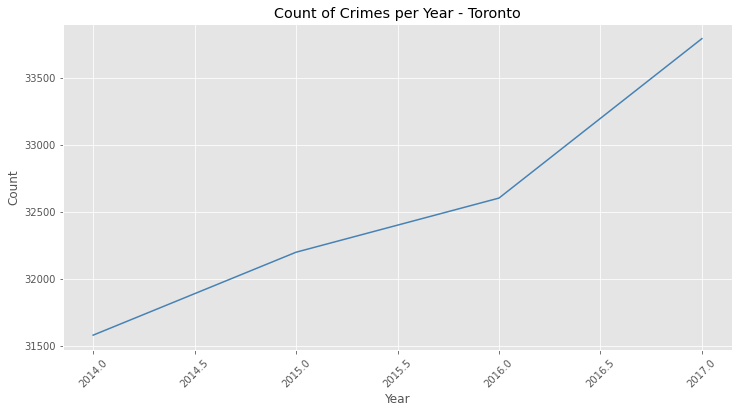

,Occurrence_Year,Crime_Count
0,2014.0,31578
1,2015.0,32197
2,2016.0,32601
3,2017.0,33791


In [15]:
cf.yearly_crimes(df = crime_df, title = 'Count of Crimes per Year - Toronto', save_plot = True)


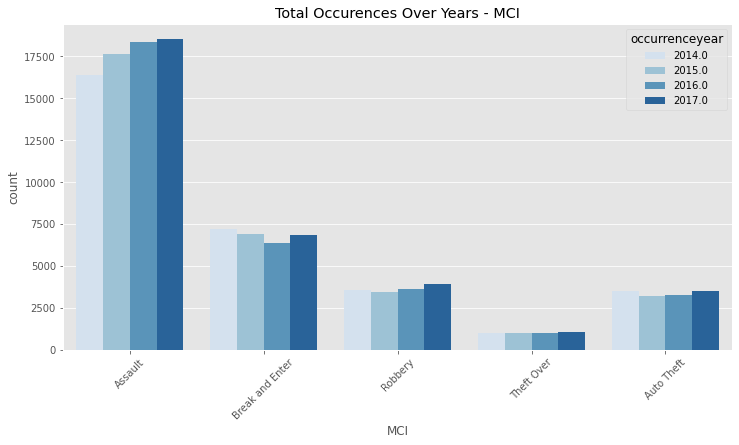

In [16]:
cf.total_occurrences_yearly(data = crime_df, x = 'MCI', hue = 'occurrenceyear', title = 'Total Occurences Over Years - MCI',
                            color = 'Blues', save_plot = True)

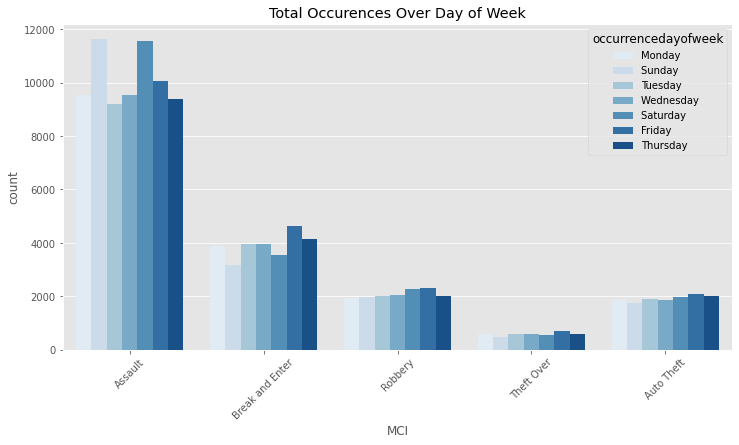

In [17]:
cf.total_occurrences_yearly(data = crime_df, x = 'MCI', hue = 'occurrencedayofweek', 
                            title = 'Total Occurences Over Day of Week', color = 'Blues', save_plot = True)


<Figure size 432x288 with 0 Axes>

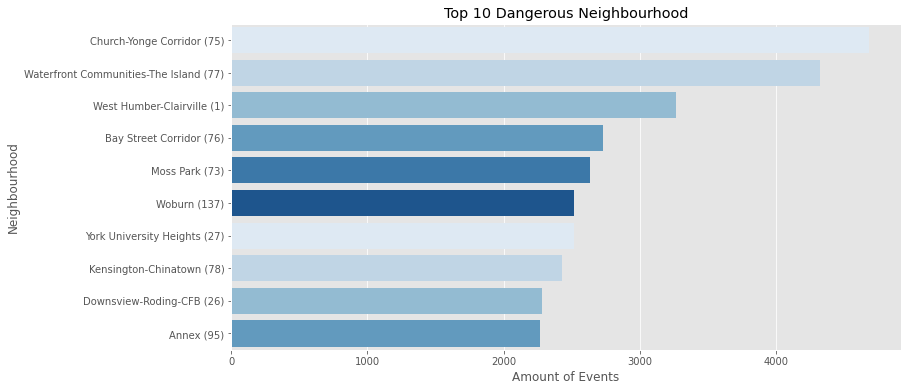

In [18]:
cf.plot_top_danger_neighbourhoods(data = crime_df, y = 'Neighbourhood', color = 'Blues',
                                  title = 'Top 10 Dangerous Neighbourhood', save_plot = True)


<Figure size 432x288 with 0 Axes>

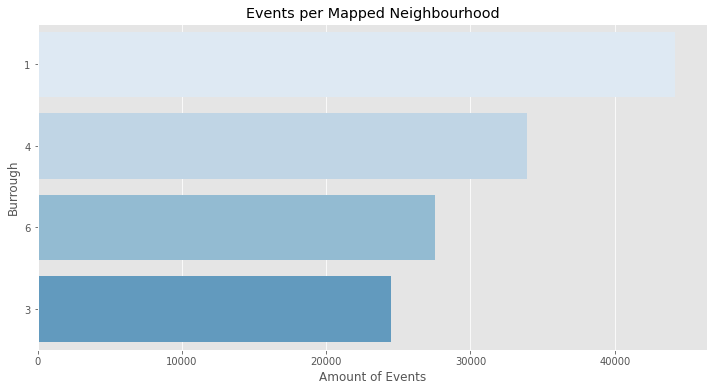

In [19]:
cf.plot_top_danger_neighbourhoods(data = crime_df, y = 'Burrough', color = 'Blues', 
                                  title = 'Events per Mapped Neighbourhood', save_plot = True)


### Predict the Burrough of the Next Crime

In [16]:
feat_cols = ['feat_MCI', 'feat_premisetype', 'feat_offence', 
             'occurrenceyear', 'feat_occurrencemonth', 'feat_occurrencedayofweek', 
             'occurrencehour', 'Burrough']

In [17]:
X,y = cf.feature_selection(data = crime_df, feat_cols = feat_cols, target_col = 'Burrough')

In [18]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35)

In [19]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
# predict
y_pred_XGB = model.predict(X_test)
y_training_XGB = model.predict(X_train)

In [21]:
# result display
print("Testing Accuracy:", round(metrics.accuracy_score(y_test, y_pred_XGB) * 100, 2), "%")
print("Training Accuracy:", round(metrics.accuracy_score(y_train, y_training_XGB)* 100, 2), "%\n")

print('Classification report: \n', metrics.classification_report(y_test, y_pred_XGB), "\n")

Testing Accuracy: 38.03 %
Training Accuracy: 38.37 %

Classification report: 
               precision    recall  f1-score   support

           1       0.39      0.81      0.53     15414
           3       0.26      0.01      0.01      8532
           4       0.35      0.25      0.29     12130
           6       0.35      0.19      0.25      9483

    accuracy                           0.38     45559
   macro avg       0.34      0.31      0.27     45559
weighted avg       0.35      0.38      0.31     45559
 



In [22]:
model.predict([[1.000e+00, 5.000e+00, 0.000e+00, 2.016e+03, 4.000e+00, 4.000e+00, 9.000e+00]])

array([1])

In [25]:
# save the model to disk
filename = '../model_GB.pkl'
pickle.dump(model, open(filename, 'wb'))
 

In [26]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.38027612546368444
